# Part II - Main findings on Ford GoBike System
## by Andrés Martínez

## Investigation Overview

We have investigated a dataset of the Ford GoBike bike-rental service. We made different kind of explorations of the variables present in the dataframe: univariate, bivariate and multivariate explorations.

On univariate explorations we analyced: duration of trips, distances covered by trips, age of users, user types, users gender, use of the service over time and on the different week days, stations popularity and stations balance between incoming and outgoing bikes.

On bivariate explorations we analyced: distance-duration relationship, users age by day of the week, use over time on a weekday and on a day of the weekend and station popularity and bike availability relationship.

And on the multivariate exploration we made a scattermatrix on the variables distance, duration and users age, and a facet grid comparing users age and gender on a normal weekday and a day of the weekend.


## Dataset Overview and Executive Summary

In this document we will use different dataframes taken from a dataset which includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during the month of february the year 2019.

From the original dataset we created two different dataframes: one with the information on individual trips and other with the information on the bike stations.

Using these dataframes, we will plot four different visualizations which lead us to different conclusions:

1. Gender of Ford GoBike users: Ford GoBike users are mostly male.

2. Use of the bike-rental service during the week: the days of the weekend the number of trips reduces almost to the half.

3. When do users use the service? What do they use it for?: there is a huge increase in the number of trips on rush hours on weekdays. Many users use the service as a mean of transport to go to work.

4. Stations popularity and balance between incoming and outgoing bikes: more popular stations usually have more incoming bikes than outgoing, and in less popular stations it is possible to find a bigger difference between incoming and outgoing bikes.

In [53]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from my_functions import print_percentage

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [54]:
# load in the datasets into pandas dataframes
df_clean = pd.read_csv('./cleaned_datasets/201902_bikerental_clean.csv')
df_stations = pd.read_csv('./cleaned_datasets/201902_bikestations.csv')

df_clean[['start_time', 'end_time']] = df_clean[['start_time', 'end_time']].apply(pd.to_datetime)

# # We load our clean data
# df_clean.to_csv('./cleaned_datasets/201902_bikerental_clean.csv')
# df_clean_out.to_csv('./cleaned_datasets/201902_bikerental_clean_without_outliers.csv')
# df_stations.to_csv('./cleaned_datasets/201902_bikestations.csv')
# df_weekday_sample.to_csv('./cleaned_datasets/20190205_bikerental_weekday.csv')
# df_weekend_sample.to_csv('./cleaned_datasets/20190210_bikerental_saturday.csv')

## 1. Gender of Ford GoBike Users

In this visualization we plot a barchart showing the number of trips by gender of users.

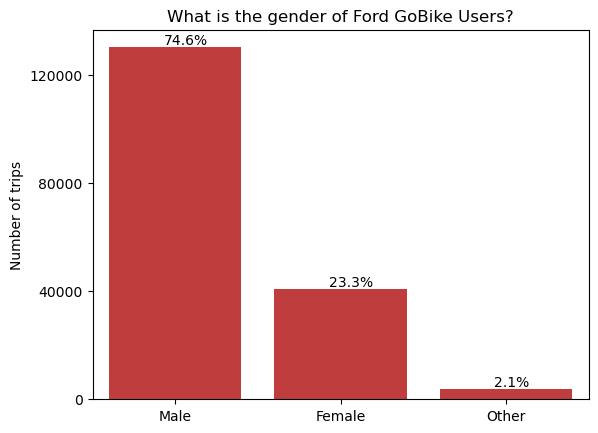

In [55]:
# Order of results
order= df_clean.member_gender.value_counts().sort_values(ascending=False).index

# Plotting
sns.countplot(data=df_clean, x='member_gender', color='tab:red', order=order);
plt.title('What is the gender of Ford GoBike Users?')
plt.ylabel('Number of trips')
plt.xlabel('')
plt.yticks(ticks=[0, 40000, 80000, 120000])
# Print the percentage on the bars
print_percentage(data=df_clean, column_name='member_gender', order=order, x_shift=0.07)

We found that 74.5% from all trips are held by male users. This is a big different respect to other genders.

## 2. Use of the bike-rental service over the week

In this plot we show the number of trips taken on the different days of the week

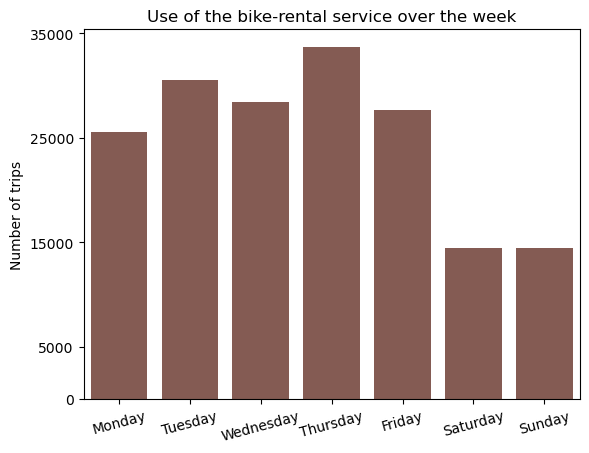

In [56]:
color=sns.color_palette()[5]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df_clean, x='day_week', color=color, order=order)
plt.title('Use of the bike-rental service over the week')
plt.ylabel('Number of trips')
plt.yticks(ticks=[0, 5000, 15000, 25000, 35000])
plt.xticks(rotation=15);
plt.xlabel('');

On weekends the number of trips is smaller than on weekdays. The activity reduces almost to the half.

## 3. When do users use the service? What do they use it for?

We plot the time of trips on a normal day (tuesday 5th of february) and on a day of the weekend (saturday 10th of february)

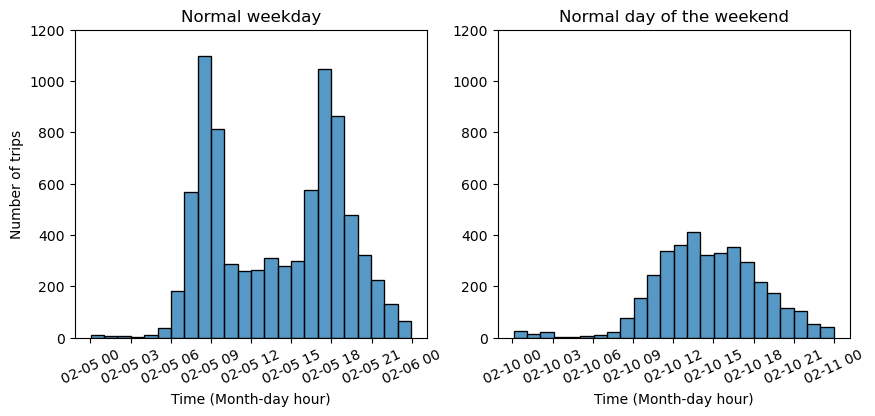

In [57]:
plt.figure(figsize=[10, 4])

# We create a dataframe the data of a normal weekday
start_wd = dt.datetime(2019, 2, 5)
end_wd = dt.datetime(2019, 2, 6)
df_weekday_sample = df_clean[(df_clean['start_time'] > start_wd) & (df_clean['start_time'] < end_wd)]

# We plot the trips distribution in time
plt.subplot(1, 2, 1)
sns.histplot(data=df_weekday_sample, x='start_time', bins=24)
plt.xticks(rotation=25);
plt.xlabel('Time (Month-day hour)')
plt.title('Normal weekday')
plt.ylim(0, 1200)
plt.ylabel('Number of trips')

# We plot the trips distribution in time on a saturday
start_wend = dt.datetime(2019, 2, 10)
end_wend = dt.datetime(2019, 2, 11)
df_weekend_sample = df_clean[(df_clean['start_time'] > start_wend) & (df_clean['start_time'] < end_wend)]

plt.subplot(1, 2, 2)
sns.histplot(data=df_weekend_sample, x='start_time', bins=24)
plt.xticks(rotation=25);
plt.xlabel('Time (Month-day hour)')
plt.title('Normal day of the weekend');
plt.ylim(0, 1200)
plt.ylabel('');

We observe a huge increase in the number of trips arround 8 a.m. and 5 p.m. on the weekday coincidir with rush hours. This make us think that many users use the service as a mean of transport to go to work.

## 4. Stations popularity and balance between incoming and outgoing bikes

To have a measure of bike availability on a station we created a coeficient which takes into account the balance of incoming and outgoing bikes in a station, called bike availability coefficient.

The values of this coefficient can be interpreted as follows:
- A value equal cero mean that there is a full balance between incoming and out going bikes. 
- A positive value indicate that the number of incoming bikes is bigger than the outgoing bikes.
- A negative value indicate that the number of outgoing bikes is bigger than the incoming bikes.

Also, we call popularity of a station to the total trips starting or ending in that stations. 

In this plot we visualice the bike availability coefficient compared to the popularity of the stations.

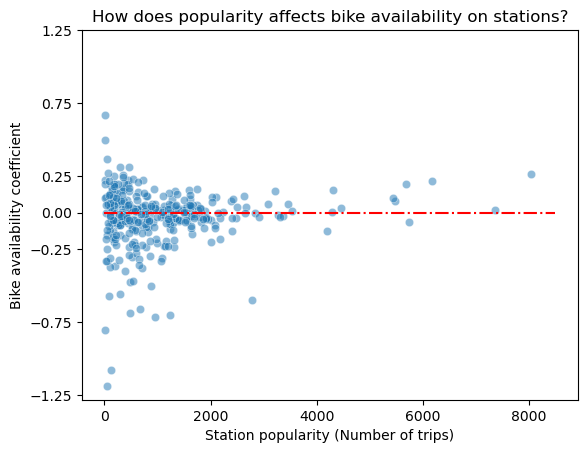

In [58]:
sns.scatterplot(data=df_stations, x='station_popularity', y='bike_availability_coef', alpha=0.5)
plt.plot([0, 8500], [0, 0], 'r-.');
plt.title('How does popularity affects bike availability on stations?')
plt.xlabel('Station popularity (Number of trips)')
ticks = list(np.arange(-1.25, 1, 0.5))
plt.yticks([-1.25, -0.75, -0.25, 0, 0.25, 0.75, 1.25])
plt.ylabel('Bike availability coefficient');

Most stations have bike availability coefficients close to cero, which means that they are balanced as regards incoming and outgoing bikes.

In lower popularity stations we find bigger negative coefficients, and stations with higher popularity usually have positive coefficients.

In [59]:
# We save this notebook as an html file
!jupyter nbconvert Part_II_explanatory_template.ipynb --to html

[NbConvertApp] Converting notebook Part_II_explanatory_template.ipynb to html
[NbConvertApp] Writing 766602 bytes to Part_II_explanatory_template.html
